In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

In [7]:
# створюємо на основі двошарової нейромережі тришарову
class Classification(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__() 
        self.layer1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU() 
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1) 

    def forward(self, x): 
        out = self.layer1(x)  
        out = self.relu(out) 
        out = self.layer2(out)
        out = self.relu(out)
        out = self.layer3(out)
        out = self.softmax(out) 
        return out


In [8]:
input_size = 784
num_classes = 10
learning_rate = 0.001
hidden_size = 500

batch_size = 100
num_epochs = 20

train_dataset = datasets.MNIST(root='data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [9]:
model = Classification(input_size, hidden_size, num_classes)

In [10]:
# Оцінюємо похибку та точність визначення класів старої моделі
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

losses = []
accuracies = []
model.train()

Classification(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=500, bias=True)
  (layer3): Linear(in_features=500, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Epoch: [1/20], Loss: 2.3026, Accuracy: 7.30%
Epoch: [2/20], Loss: 2.3023, Accuracy: 8.51%
Epoch: [3/20], Loss: 2.3020, Accuracy: 9.86%
Epoch: [4/20], Loss: 2.3018, Accuracy: 11.30%
Epoch: [5/20], Loss: 2.3015, Accuracy: 12.79%
Epoch: [6/20], Loss: 2.3012, Accuracy: 14.35%
Epoch: [7/20], Loss: 2.3009, Accuracy: 16.07%
Epoch: [8/20], Loss: 2.3006, Accuracy: 17.77%
Epoch: [9/20], Loss: 2.3003, Accuracy: 19.32%
Epoch: [10/20], Loss: 2.3000, Accuracy: 21.04%
Epoch: [11/20], Loss: 2.2996, Accuracy: 22.63%
Epoch: [12/20], Loss: 2.2993, Accuracy: 24.24%
Epoch: [13/20], Loss: 2.2990, Accuracy: 25.92%
Epoch: [14/20], Loss: 2.2986, Accuracy: 27.59%
Epoch: [15/20], Loss: 2.2982, Accuracy: 29.40%
Epoch: [16/20], Loss: 2.2979, Accuracy: 30.95%
Epoch: [17/20], Loss: 2.2975, Accuracy: 32.77%
Epoch: [18/20], Loss: 2.2971, Accuracy: 34.33%
Epoch: [19/20], Loss: 2.2966, Accuracy: 35.94%
Epoch: [20/20], Loss: 2.2962, Accuracy: 37.33%


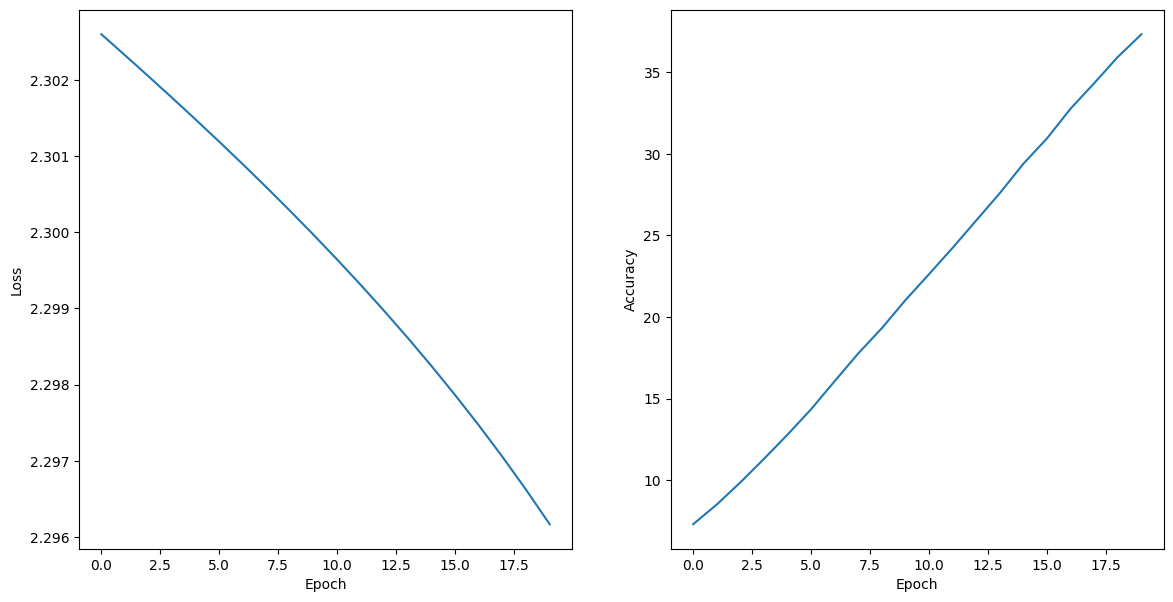

In [11]:
for epoch in range(num_epochs):
    loss_tot = 0
    correct = 0
    total = 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        loss_tot += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    losses.append(loss_tot / len(train_loader))
    accuracies.append(accuracy)
    print('Epoch: [%d/%d], Loss: %.4f, Accuracy: %.2f%%' % (epoch+1, num_epochs, loss_tot / len(train_loader), accuracy))

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss-OLD Model')
plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy-OLD Model')
plt.show()


Epoch: [1/20], Loss: 0.0057, Accuracy: 92.05%
Epoch: [2/20], Loss: 0.0026, Accuracy: 96.75%
Epoch: [3/20], Loss: 0.0003, Accuracy: 97.68%
Epoch: [4/20], Loss: 0.0043, Accuracy: 98.06%
Epoch: [5/20], Loss: 0.0026, Accuracy: 98.50%
Epoch: [6/20], Loss: 0.0023, Accuracy: 98.75%
Epoch: [7/20], Loss: 0.0021, Accuracy: 98.90%
Epoch: [8/20], Loss: 0.0015, Accuracy: 98.95%
Epoch: [9/20], Loss: 0.0047, Accuracy: 99.10%
Epoch: [10/20], Loss: 0.0038, Accuracy: 99.05%
Epoch: [11/20], Loss: 0.0012, Accuracy: 99.21%
Epoch: [12/20], Loss: 0.0021, Accuracy: 99.25%
Epoch: [13/20], Loss: 0.0000, Accuracy: 99.26%
Epoch: [14/20], Loss: 0.0007, Accuracy: 99.40%
Epoch: [15/20], Loss: 0.0000, Accuracy: 99.40%
Epoch: [16/20], Loss: 0.0014, Accuracy: 99.37%
Epoch: [17/20], Loss: 0.0038, Accuracy: 99.42%
Epoch: [18/20], Loss: 0.0040, Accuracy: 99.27%
Epoch: [19/20], Loss: 0.0000, Accuracy: 99.34%
Epoch: [20/20], Loss: 0.0002, Accuracy: 99.31%


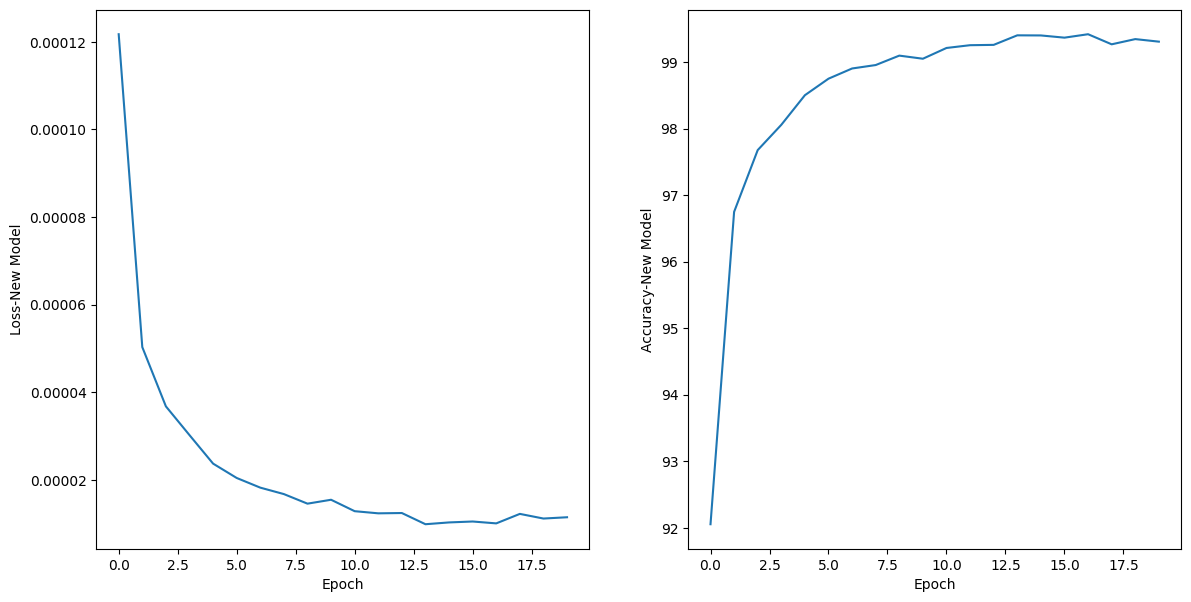

In [12]:
# Оцінюємо похибку та точність визначення класів нової моделі
new_criterion = nn.MSELoss()  # Mean Squared Error Loss
new_optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Adam optimizer

losses = []
accuracies = []
model.train()

for epoch in range(num_epochs):
    loss_tot = 0
    correct = 0
    total = 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28)
        new_optimizer.zero_grad()
        outputs = model(images)
        labels_one_hot = nn.functional.one_hot(labels, num_classes)  # Convert labels to one-hot encoding
        loss = new_criterion(outputs, labels_one_hot.float())  # Calculate MSE Loss with one-hot encoded labels
        loss.backward()
        new_optimizer.step()

        loss_tot += loss.detach().data

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    losses.append(loss_tot / len(train_dataset))
    accuracies.append(accuracy)
    print('Epoch: [%d/%d], Loss: %.4f, Accuracy: %.2f%%' % (epoch+1, num_epochs, loss, accuracy))

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss-New Model')
plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy-New Model')
plt.show()


new model явно краще так як accuracy високе (майже 1), а втрати низькі